C:\Users\alber\AppData\Local\Temp\ipykernel_4752\1200882617.py:14: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags=tags)
C:\Users\alber\AppData\Local\Temp\ipykernel_4752\1200882617.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coordinates = [(point.y, point.x) for point in gdf.geometry.centroid]


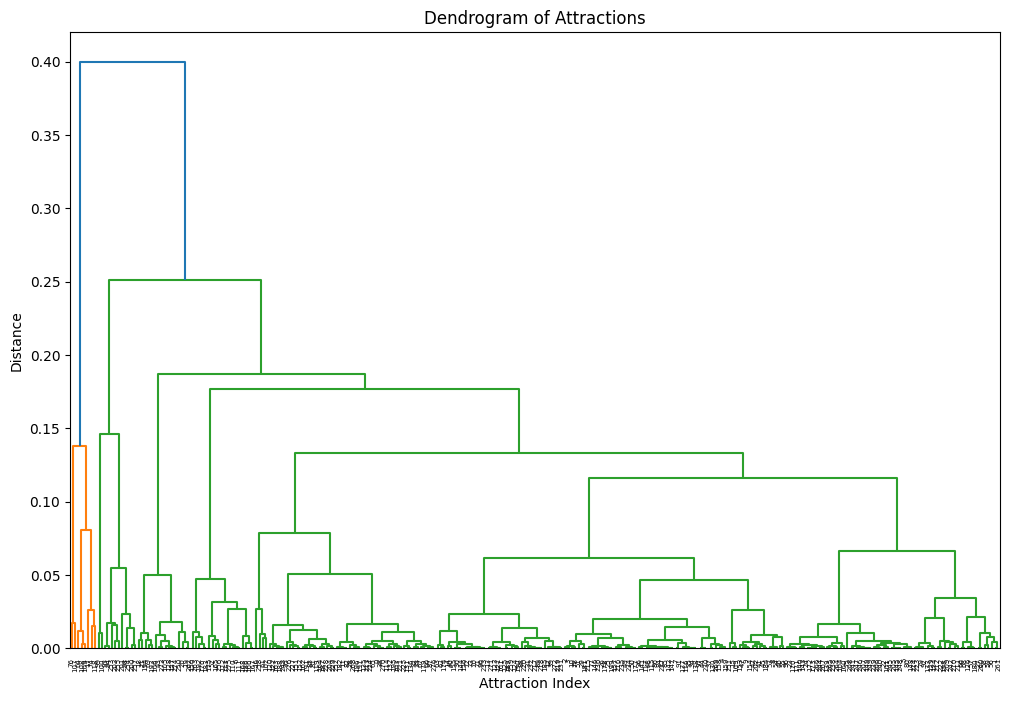

In [58]:
import osmnx as ox
import geopandas as gpd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Загрузите граф и получите геометрии
place = 'г Смоленск, Смоленская область, Россия'
G = ox.graph_from_place(place, network_type='walk')
tags = {'tourism': ['attraction', 'viewpoint'],
        'leisure': ['park', 'garden'],
        'historic': ['memorial', 'yes'],
        'amenity': ['theatre', 'fountain'],
        'memorial': ['statue', 'stele', 'stone', 'war_memorial', 'bust']}
gdf = ox.geometries_from_place(place, tags=tags)

# Произведите агломеративную кластеризацию
coordinates = [(point.y, point.x) for point in gdf.geometry.centroid]
Z = linkage(coordinates, method='ward')

# Визуализация дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram of Attractions')
plt.xlabel('Attraction Index')
plt.ylabel('Distance')
plt.show()

In [59]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import haversine_distances

# Ваши данные с координатами достопримечательностей
# Например, gdf содержит геометрические данные, включая столбец 'geometry' с координатами
# Допустим, у вас есть DataFrame gdf с колонкой 'geometry', содержащей координаты.

# Преобразуйте координаты в радианы
gdf['lat_rad'] = np.radians(gdf['geometry'].centroid.y)
gdf['lon_rad'] = np.radians(gdf['geometry'].centroid.x)

# Вычислите матрицу расстояний с использованием haversine_distances
dist_matrix = haversine_distances(gdf[['lat_rad', 'lon_rad']])

# Настройте агломеративную кластеризацию
# linkage='ward' используется для метода ward, который объединяет кластеры на основе минимизации дисперсии
# n_clusters=None означает, что алгоритм сам определит количество кластеров на основе расстояний
cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0.001, n_clusters=None)

# Проведите кластеризацию
gdf['cluster'] = cluster.fit_predict(dist_matrix)

# Теперь у вас есть колонка 'cluster' в DataFrame, указывающая кластер для каждой достопримечательности


C:\Users\alber\AppData\Local\Temp\ipykernel_4752\444773429.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat_rad'] = np.radians(gdf['geometry'].centroid.y)
C:\Users\alber\AppData\Local\Temp\ipykernel_4752\444773429.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon_rad'] = np.radians(gdf['geometry'].centroid.x)
D:\jupyter_notebook\venv1\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
D:\jupyter_notebook\venv1\Lib\site-packages\scipy\cluster\hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks 

In [60]:
gdf['cluster'].nunique()

62

In [61]:
gdf.shape

(277, 63)

In [62]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Загрузите граф и достопримечательности
place = 'г Смоленск, Смоленская область, Россия'
G = ox.graph_from_place(place, network_type='walk')
tags = {'tourism': ['attraction', 'viewpoint'],
        'leisure': ['park', 'garden'],
        'historic': ['memorial', 'yes'],
        'amenity': ['theatre', 'fountain'],
        'memorial': ['statue', 'stele', 'stone', 'war_memorial', 'bust']}
gdf = ox.geometries_from_place(place, tags=tags)

# Создайте пустой GeoDataFrame для хранения центроидов
centroids_gdf = gpd.GeoDataFrame(columns=['category', 'geometry'])

# # Вычислите центроиды для каждой категории
# for category, category_tags in tags.items():
#     category_gdf = gdf[gdf['tourism'].isin(category_tags)].copy()
#     category_gdf['category'] = category
#     category_gdf['centroid'] = category_gdf['geometry'].centroid
#     centroids_gdf = pd.concat([centroids_gdf, category_gdf[['category', 'centroid']]])

# Преобразуйте координаты центроидов в список
centroid = gdf['geometry'].centroid
X = []
for i in centroid:
    X.append([i.x, i.y])

# Выполните k-means кластеризацию
kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(X)

# Добавьте метки кластеров к GeoDataFrame центроидов
centroids_gdf['cluster'] = kmeans.labels_

# # Визуализируйте результаты
# fig, ax = ox.plot_graph(G, show=False, close=False)
# centroids_gdf.plot(ax=ax, column='cluster', legend=True, cmap='viridis', markersize=50, alpha=0.8)
# plt.show()

C:\Users\alber\AppData\Local\Temp\ipykernel_4752\1713274545.py:15: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags=tags)
C:\Users\alber\AppData\Local\Temp\ipykernel_4752\1713274545.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf['geometry'].centroid
D:\jupyter_notebook\venv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


D:\jupyter_notebook\venv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\jupyter_notebook\venv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\jupyter_notebook\venv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\jupyter_notebook\venv1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

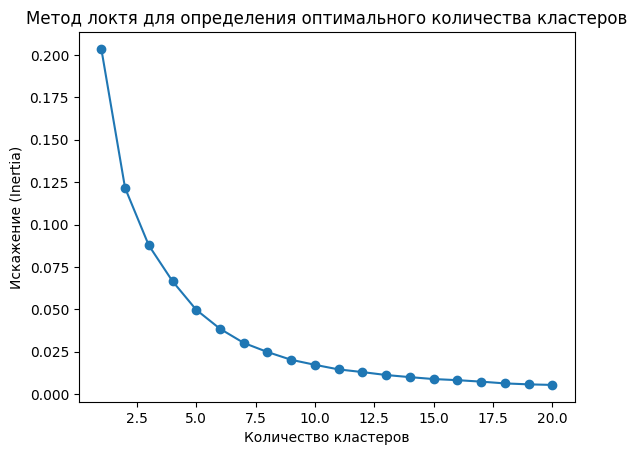

In [63]:
distortions = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=7)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Постройте график метода локтя
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение (Inertia)')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.show()

---

In [104]:
import sys
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [65]:
import osmnx as ox
from geopy.distance import geodesic
import networkx as nx
from matplotlib import pyplot as plt
import folium as fm
import numpy as np

from tqdm import tqdm

import random
import geopandas as gpd
from deap import base, creator, tools, algorithms

from shapely.geometry import Polygon, LineString, Point
from shapely.ops import nearest_points, transform
from functools import partial
from pyproj import Proj, transform

In [66]:
place = 'г Смоленск, Смоленская область, Россия' # город для которого нужен граф
G = ox.graph_from_place(place, network_type='walk') # загрузка графа по адрессу места (в нашем случае город)

In [67]:
# теги для отбора геометрий
tags = {'tourism': ['attraction', 'viewpoint'], 
        'leisure': ['park', 'garden'], 
        'historic': ['memorial', 'yes'], 
        'amenity': ['theatre', 'fountain'], 
        'memorial': ['statue', 'stele', 'stone', 'war_memorial', 'bust']}


# функция ищет ближайшую точку от цетра объекта gdf(GeoDataFrame)
def fin_nearest_nodes(gdf):
    
    nns = {}
    imp = {}
    
    for i in range(gdf.shape[0]):
        obj = gdf.iloc[i, :]
        nn = ox.nearest_nodes(G, obj['geometry'].x, obj['geometry'].y)
        nns[nn] = 0.009
        imp[nn] = 1
        if not obj.historic is np.nan:
            nns[nn] /= 2 
            imp[nn] += 3
        if not obj["subject:wikidata"] is np.nan or not obj["subject:wikipedia"] is np.nan:  # subject:wikipedia
            nns[nn] /= 2
            imp[nn] += 3
        if not obj["name"] is np.nan:
            nns[nn] -= 0.00125
            imp[nn] += 2
            
    return nns, imp

In [83]:
gdf = ox.geometries_from_place(place, tags=tags) # находит из геометрии нашего графа

index_nodes = [] # список для нод
index_relations = [] # список для ребер

for i in range(gdf.shape[0]): # прохожусь по всем объектам в gdf, если это нода то добавляю к index_nodes
    if 'node' in gdf.index[i]:
        index_nodes.append(i)
    else:
        index_relations.append(i) # иначе к index_relations. В этом списке могут быть индексы объектов с типом way (тоже самое что relation)
        
gdf['importance'] = 1
for i in range(gdf.shape[0]):
    obj = gdf.iloc[i, :]
    if not obj['historic'] is np.nan:
        gdf.iloc[i, -1] += 3
    if not obj["subject:wikidata"] is np.nan or not obj["subject:wikipedia"] is np.nan:  # subject:wikipedia
        gdf.iloc[i, -1] += 3
    if not obj["name"] is np.nan:
        gdf.iloc[i, -1] += 2
        
        
nodes_gdf = gdf.iloc[index_nodes, :] # дальше беру срез объектов отобранных циклом
relations_gdf = gdf.iloc[index_relations, :] # дальше беру срез объектов отобранных циклом

# считаю центры всех достопримечательностей что нашел(на карте будут синими точками)
centroids = gdf.centroid 
X = centroids.x 
Y = centroids.y 

mask_nodes, importance = fin_nearest_nodes(nodes_gdf) # нахожу ближайшие ноды для точечных достопримечательностей (пример: статуя, памятник)

C:\Users\alber\AppData\Local\Temp\ipykernel_4752\2592685228.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags=tags) # находит из геометрии нашего графа
C:\Users\alber\AppData\Local\Temp\ipykernel_4752\2592685228.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.centroid


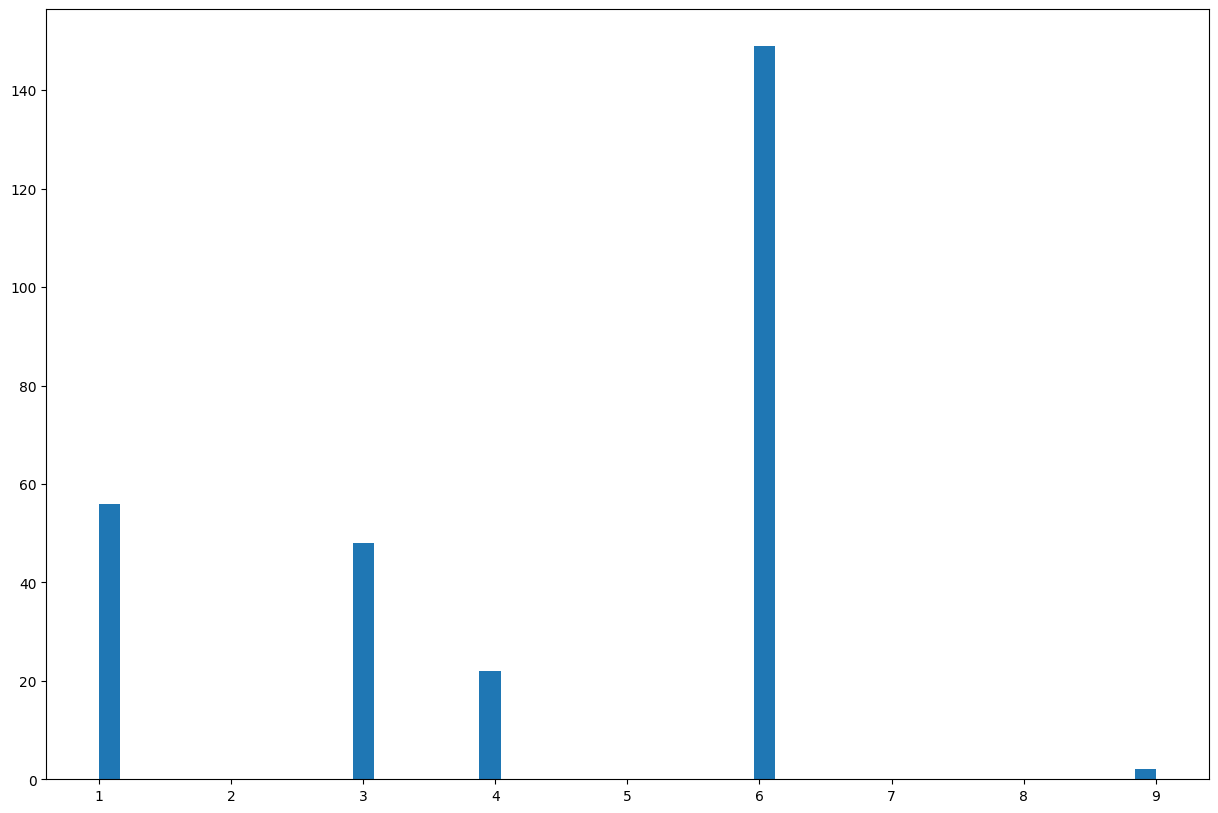

In [117]:
plt.figure(figsize=(15, 10))
plt.hist(gdf['importance'], bins=50)
plt.show()

In [85]:
# the length unit is now `meter`
eqArea_lakeSup = relations_gdf.to_crs(epsg=6933)

# compute areas in sq meters
areas = eqArea_lakeSup.area


def set_group(area):
    return round(area ** 0.5)

# and add it as a new column to geodataframe
eqArea_lakeSup["area_m"] = np.sqrt(areas.values)
relations_gdf["area_radius"] = eqArea_lakeSup["area_m"].apply(lambda x: set_group(x))

# print some result
eqArea_lakeSup[["name","area_m"]].head()

D:\jupyter_notebook\venv1\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


name     area_m
element_type osmid                                    
way          78392602      Башня Позднякова  13.276899
             78392604        Башня Воронина  12.489482
             78392605     Никольские ворота   9.428951
             78392612  Авраамиевские ворота  17.539556
             78392616          Прясла стены   8.035392

In [86]:
def build_geocode(name1=None, name2=None): # функция для перевода адрессов в геокод (lat, lon)
    assert name1 is not None, '1st name is None'
    assert name2 is not None, '2nd name is None'
    
    place1 = ox.geocode(name1) # метод перевода из коробки для карт OSM(Open Street Map)
    place2 = ox.geocode(name2) # метод перевода из коробки для карт OSM(Open Street Map)
    
    return place1, place2


def build_path(graph=None, point1=(), point2=(), mode='time'): # функция для отрисовки карты
    assert graph is not None, 'Your graph is NoneType object'
    assert len(point1) == 2, '1st point hasn`t 2 coordinates'
    assert len(point2) == 2, '2nd point hasn`t 2 coordinates'
    
    start_node = ox.nearest_nodes(graph, point1[1], point1[0]) # для полученных координат находится ближайшая нода
    finish_node = ox.nearest_nodes(graph, point2[1], point2[0]) # для полученных координат находится ближайшая нода
    
    route = nx.shortest_path(graph, start_node, finish_node, weight=mode) # строится короткий путь по Алгоритму Дейкстры по атрибуту mode(параметр функции)
    
    shortest_route_map = ox.plot_route_folium(graph, route) # отрисовка карты
    
    fm.TileLayer('openstreetmap').add_to(shortest_route_map) # добавление стиля
    
    # маркеры начала и конца пути
    start_marker = fm.Marker(
            location=point1,
            popup='Начало маршрута',
            icon=fm.Icon(color='green'))

    finish_marker = fm.Marker(
                location=point2,
                popup='Конец маршрута',
                icon=fm.Icon(color='red'))

    # добавление их на карту
    start_marker.add_to(shortest_route_map)
    finish_marker.add_to(shortest_route_map)
    
    # цикл на добавление синих маркеров с центрами достопримечательностей(чтобы понять как идёт путь)
    for i in range(gdf.shape[0]):
        if i == 100:
            break
        marker = fm.Marker(
                    location=(Y[i], X[i]),
                    popup=gdf.name[i],
                    icon=fm.Icon(color='blue'))
        marker.add_to(shortest_route_map)
    
    return shortest_route_map

In [88]:
def set_basic_attr(graph, attr, val=1): # функция которая задаёт базовый вес
    
    assert val != None, "Value is NoneType object"
    
    for u, v, data in graph.edges(data=True):
        data[attr] = data['length'] * val


def set_edge_attr(graph, attr, mask=[]): # функция которая задаёт вес для нод
    
    assert len(mask) != 0
    
    for i in tqdm(range(nodes_gdf.shape[0])):
        center_point = nodes_gdf.iloc[i, :]['geometry']
        radius = 3
        # Создайте геометрическую форму для окружности
        circle = Point(center_point).buffer(radius)

        # Отфильтруйте рёбра, которые пересекают окружность
        edges_to_update = []
        for u, v, data in graph.edges(data=True):
            edge_geometry = data.get('geometry', None)
            if edge_geometry is not None:
                if edge_geometry.intersects(circle):
                    edges_to_update.append((u, v, data))

        for u, v, data in edges_to_update: # проходимся по всем рёбрам и если там есть нода из mask то меняем вес
            if u in mask and v in mask:
                data[attr] = data['length'] * min([mask[v], mask[u]])
            elif u in mask:
                data[attr] = data['length'] * mask[u]
            elif v in mask:
                data[attr] = data['length'] * mask[v]
            
            
            
def set_polygon_edge_attr(graph, attr, gdf=[], global_gdf=[]): # функция которая задаёт вес для геометрий
    
    assert len(gdf) != 0, "Filter object has 0 length"
    assert len(global_gdf) != 0, "Filter object has 0 length"

    relation_centers = gdf.centroid
    for i in tqdm(range(gdf.shape[0])):
        center_point = relation_centers[0]
        radius = gdf.iloc[i, :]['area_radius']
        # Создайте геометрическую форму для окружности
        circle = Point(center_point).buffer(radius)

        # Отфильтруйте рёбра, которые пересекают окружность
        edges_to_update = []
        for u, v, data in graph.edges(data=True):
            edge_geometry = data.get('geometry', None)
            if edge_geometry is not None:
                if edge_geometry.intersects(circle):
                    edges_to_update.append((u, v, data))

        # Уменьшите атрибуты рёбер для отфильтрованных рёбер
        for u, v, data in edges_to_update:
            obj = global_gdf.iloc[i, :]
            w = 0.009
            if not obj.historic is np.nan:
                w /= 2
            if not obj["subject:wikidata"] is np.nan or not obj["subject:wikipedia"] is np.nan:  # subject:wikipedia
                w /= 2
            if not obj["name"] is np.nan:
                w -= 0.002
            if data[attr] == 1:
                data[attr] = data['length'] * w
            else:
                data[attr] = min([data[attr], data['length'] * w])

In [89]:
%%time

# вызываем методы
set_basic_attr(G, 'weight', 1)

CPU times: total: 46.9 ms
Wall time: 78.6 ms


In [90]:
%%time

set_edge_attr(G, 'weight', mask_nodes)

100%|████████████████████████████████████████████████████████████████████████████████| 119/119 [02:36<00:00,  1.32s/it]

CPU times: total: 2min 15s
Wall time: 2min 36s


In [106]:
%%time

set_polygon_edge_attr(G, 'weight', relations_gdf, gdf)

  0%|                                                                                          | 0/158 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# from neo4j import GraphDatabase
# import osmnx as ox

# # Функция для загрузки графа в Neo4j
# def load_graph_to_neo4j(graph, uri, user, password):
#     # Инициализация драйвера Neo4j
#     driver = GraphDatabase.driver(uri, auth=(user, password))

#     # Создание сессии для выполнения запросов
#     with driver.session() as session:
#         # Создание узлов для каждой вершины в графе
#         for node, data in graph.nodes(data=True):
#             session.run(
#                 "CREATE (n:Node {id: $id, x: $x, y: $y})",
#                 id=node,
#                 x=data["x"],
#                 y=data["y"]
#             )

#         # Создание связей для каждого ребра в графе
#         for u, v, data in graph.edges(data=True):
#             session.run(
#                 "MATCH (a:Node {id: $u}), (b:Node {id: $v}) "
#                 "CREATE (a)-[:CONNECTS {length: $length}]->(b)",
#                 u=u,
#                 v=v,
#                 length=data.get("length", 1)  # По умолчанию 1, если атрибут 'length' отсутствует
#             )

# # Параметры подключения к базе данных Neo4j
# neo4j_uri = "neo4j+s://faa2e325.databases.neo4j.io"  # Ваш URI для подключения к Neo4j
# neo4j_user = "neo4j"          # Ваше имя пользователя
# neo4j_password = "38s0-XF0wtNXTJ-3K1PyXROrA9187PWmB2d48vNOXAs"      # Ваш пароль

# # Загрузка графа в Neo4j
# load_graph_to_neo4j(G, neo4j_uri, neo4j_user, neo4j_password)

In [92]:
start_name = '''
36, улица Октябрьской Революции, Ленинский район, городской округ Смоленск, 
Смоленская область, Центральный федеральный округ, 210000, Россия
'''
# start_name = '''
# переулок Ульянова 1, город Смоленск, Россия
# '''
# start_name = '''
# проспект Гагарина, 1, город Смоленск, Россия
# '''

finish_name =  '''
Гимназия им. Пржевальского, улица Ленина, Ленинский район, городской округ Смоленск, 
Смоленская область, Центральный федеральный округ, 210000, Россия
'''
# finish_name =  '''
# Смоленский филиал МЭИ, город Смоленск, Россия
# '''
# finish_name =  '''
# улица Соболева, 1
# '''

points = build_geocode(start_name, finish_name)
m = build_path(G, points[0], points[1], 'weight')
# m.save('map.html')
m

C:\Users\alber\AppData\Local\Temp\ipykernel_4752\3589776206.py:21: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  shortest_route_map = ox.plot_route_folium(graph, route) # отрисовка карты
C:\Users\alber\AppData\Local\Temp\ipykernel_4752\3589776206.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  location=(Y[i], X[i]),
C:\Users\alber\AppData\Local\Temp\ipykernel_4752\3589776206.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future v

In [178]:
%%time

place = '''
проспект Гагарина, 1, город Смоленск, Россия
'''
point = ox.geocode(place)
start_node = ox.nearest_nodes(G, point[1], point[0])

radius = 40 * 30 / 2  # в метрах

# # Создайте список объектов, находящихся в радиусе от начальной точки
objects_in_radius = []
for i in tqdm(range(gdf.shape[0])):
    node = ox.nearest_nodes(G, X[i], Y[i])
    if geodesic(
    (G.nodes[node]['y'], G.nodes[node]['x']),
    (G.nodes[start_node]['y'], G.nodes[start_node]['x'])).meters <= radius and gdf.iloc[i, -1] >= 3:
        objects_in_radius.append(node)

print(len(objects_in_radius))

# Function to generate a random node in the graph
def random_node():
    return random.choice(list(G.nodes))

# Specify the city for which you want the graph
# place = 'г Смоленск, Смоленская область, Россия'
# G = ox.graph_from_place(place, network_type='walk')

# Create a minimization problem for finding the shortest path
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize the DEAP toolbox
toolbox = base.Toolbox()

def init_individual(icls, start_point, end_point, objects_in_radius):
    # Choose a random number of nodes between 5 and the total number of nodes
    num_nodes = random.randint(2, 6)
    
    # Sample random nodes from the list
    genes = random.sample(objects_in_radius, num_nodes)
    
    # Ensure the start and end points are included in the individual
    genes.insert(0, start_point)
    genes.append(end_point)
    
    return icls(genes)

# Register the updated init_individual function
toolbox.register("individual", init_individual, creator.Individual, start_node, start_node, objects_in_radius)

# Function to create the population
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    start_node = individual[0]
    end_node = individual[-1]
    
    path_length = 0

    if len(individual) < 2:
        return float('inf'),

    # Проверка на самопересечение маршрута
    route_line = LineString([(G.nodes[node]['x'], G.nodes[node]['y']) for node in individual])
    self_intersect_penalty = route_line.is_simple  # True, если маршрут пересекает сам себя

    # Умножаем штраф на количество пересечений
    self_intersect_penalty *= route_line.intersection(route_line).length * 10 ** 5

    visited_nodes = set()
    for i in range(len(individual) - 1):
        current_node = individual[i]
        next_node = individual[i + 1]
        if current_node in visited_nodes:
            self_intersect_penalty += 10 ** 10  # Назначьте штраф за повторное посещение узла
        visited_nodes.add(current_node)

        try:
            path_length += nx.shortest_path_length(G, source=current_node, target=next_node, weight='weight')
        except nx.NetworkXNoPath:
            path_length += 10 ** 5

    # Вычисление площади фигуры, описанной маршрутом
    gdf = gpd.GeoDataFrame(geometry=[route_line])
    gdf.crs = 'EPSG:4326'  # Установка координатной системы
    city_circle_area = np.pi * radius**2  # Площадь круга
    route_area = gdf.to_crs(epsg=3395).geometry.area.iloc[0]  # Площадь фигуры, описанной маршрутом

    # Отношение площадей с учетом штрафов
    shape_similarity_ratio = route_area / city_circle_area

    # Штраф за отклонение от формы круга
    shape_penalty = abs(1 - shape_similarity_ratio)

    # Подсчет итоговой оценки с учетом всех штрафов
    final_score = path_length + shape_penalty * 10 ** 5 + self_intersect_penalty

    return final_score,



def mutate(individual):
    # Skip the first and last elements (start and end nodes)
    tools.mutShuffleIndexes(individual[1:-1], indpb=0.1)
    return individual,



# Register additional arguments for the evaluation function
toolbox.register("evaluate", evaluate)

# Use the original crossover and mutation operators
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", mutate)
toolbox.register("select", tools.selTournament, tournsize=4)

# Create the initial population
population = toolbox.population(n=30)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=300, stats=None, halloffame=None, verbose=True)

# Print the best individual from the final population
best_individual = tools.selBest(population, k=1)[0]
print("Best Individual (Start Node, End Node):", best_individual)
print("Path Length:", best_individual.fitness.values[0])

100%|████████████████████████████████████████████████████████████████████████████████| 277/277 [00:30<00:00,  9.09it/s]


68
gen	nevals
0  	30    
1  	24    
2  	22    
3  	23    
4  	23    
5  	23    
6  	20    
7  	23    
8  	25    
9  	26    
10 	20    
11 	17    
12 	26    
13 	24    
14 	24    
15 	21    
16 	22    
17 	20    
18 	20    
19 	25    
20 	26    
21 	24    
22 	26    
23 	25    
24 	26    
25 	24    
26 	25    
27 	23    
28 	24    
29 	22    
30 	16    
31 	22    
32 	25    
33 	27    
34 	25    
35 	23    
36 	25    
37 	21    
38 	22    
39 	19    
40 	25    
41 	22    
42 	26    
43 	12    
44 	24    
45 	24    
46 	24    
47 	24    
48 	26    
49 	25    
50 	24    
51 	22    
52 	23    
53 	26    
54 	25    
55 	21    
56 	22    
57 	26    
58 	20    
59 	19    
60 	22    
61 	22    
62 	26    
63 	26    
64 	25    
65 	25    
66 	25    
67 	14    
68 	27    
69 	23    
70 	24    
71 	26    
72 	24    
73 	22    
74 	16    
75 	24    
76 	22    
77 	26    
78 	18    
79 	19    
80 	27    
81 	20    
82 	26    
83 	22    
84 	23    
85 	26    
86 	22    
87 	13    
88 	24    
89 	25 

In [179]:
# Get the geographical coordinates of the nodes in the best route
route_coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in best_individual]


for i in range(len(best_individual) - 1):
    if i == 0:
        route = nx.shortest_path(G, best_individual[i], best_individual[i + 1], weight='length')
    else:
        route += nx.shortest_path(G, best_individual[i], best_individual[i + 1], weight='length')[1:]
shortest_route_map = ox.plot_route_folium(G, route) # отрисовка карты
fm.TileLayer('openstreetmap').add_to(shortest_route_map) # добавление стиля
finish_marker = fm.Marker(
                location=point,
                popup='Начало/конец маршрута',
                icon=fm.Icon(color='red'))

finish_marker.add_to(shortest_route_map)

for i in range(gdf.shape[0]):
        if i == 100:
            break
        marker = fm.Marker(
                    location=(Y[i], X[i]),
                    popup=gdf.name[i],
                    icon=fm.Icon(color='blue'))
        marker.add_to(shortest_route_map)
        
        
shortest_route_map.save('best_circle_route.html')
shortest_route_map

In [142]:
best_individual[1:-1]

[1295683108, 1296503716, 1295683108, 1296503716, 1299771958]

In [151]:
for i in set(best_individual[1:-1]):
    print(gdf.iloc[li.index(i), 4])

Сад Блонье
Памятник Н. В. Крыленко
Памятник Гагарину
